In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('A2Q1.csv', sep=',',header=None)
X = df.values
print(np.shape(X))

(1000, 1)


In [ ]:
# Need to place K cluster centers at random locations
def random_cluster_centers(X, K):
  number_of_rows = X.shape[0]
  number_of_columns = X.shape[1]
  cluster_centers = np.zeros((K, number_of_columns))
  for i in range(K):
    cluster_centers[i] = X[np.random.randint(0, number_of_rows), :]
  return cluster_centers

In [ ]:
# Need to assign data points to the closest cluster center
def assignment(X, cluster_centers):
  K = cluster_centers.shape[0]
  Z = np.zeros((X.shape[0], 1))
  temp = np.zeros((cluster_centers.shape[0], 1))
  for i in range(X.shape[0]):
    for j in range(K):
      dist = X[i,:] - cluster_centers[j,:]
      length = np.sum(dist**2)
      temp[j] = length
    Z[i] = np.argmin(temp)+1
  return Z

In [ ]:
# Mean of each cluster
def cluster_mean(X, Z, K):
  no_of_rows = X.shape[0]
  no_of_columns = X.shape[1]
  cluster_centers = np.zeros((K, no_of_columns))
  count = np.zeros((K,1))

  for i in range(no_of_rows):
    index = int((Z[i]-1)[0])
    cluster_centers[index,:]+=X[i,:]
    count[index]+=1
  
  return cluster_centers/count

In [ ]:
def error_function(X, Z, cluster_centers):
  no_of_rows = X.shape[0]
  no_of_columns = X.shape[1]
  errors = []

  for i in range(no_of_rows):
    cluster_center = cluster_centers[int((Z[i]-1)[0])]
    error = np.linalg.norm(X[i, :] - cluster_center)
    errors.append(error**2)
  
  return sum(errors)

In [ ]:
def kmeans(X, K, max_iter = 100, tol = pow(10,-6) ):
    iteration = -1
    all_sse = []
    assignments = []
    
    centroids = random_cluster_centers(X, K)

    while (len(all_sse)<=1 or (iteration < max_iter and np.absolute(all_sse[iteration] - all_sse[iteration-1])/all_sse[iteration-1] >= tol)):
        iteration += 1
        assignments = assignment(X, centroids)
        centroids = cluster_mean(X, assignments, K)
        sse_kmeans = error_function(X, assignments, centroids)
        all_sse.append(sse_kmeans)        
        
     
    return (assignments, centroids, all_sse, iteration)

In [ ]:
result = kmeans(X,K=4)

In [ ]:
print(np.shape(result[0]))
print(np.shape(result[1]))
print(result[2])
print(result[3])

(1000, 1)
(4, 1)
[151111.82270647745, 85179.86686835966, 60057.18623221867, 43871.63198938776, 33198.57014707091, 29273.341080164406, 25459.68389870803, 22600.021699927955, 20364.419655331218, 17888.34451728737, 16306.906159355887, 14946.261399495666, 14013.611935074177, 13451.671528794868, 13255.524947570904, 13127.182547218721, 12968.330108219592, 12760.05619393716, 12542.677882837184, 12367.646044899939, 12334.32544131193, 12324.322495941195, 12294.846442237402, 12266.224807835442, 12265.698096225164, 12265.125966260099, 12264.341464096047, 12264.341464096047]
27


Text(0.5, 1.0, 'K-means Visualization')

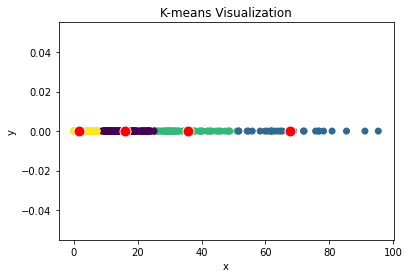

In [ ]:
centroids_x = result[1][:, 0]
centroids_y = np.zeros((4, ))
x = X[:, 0]
y = np.zeros((1000, ))
assignments = result[0]
plt.scatter(x, y, c=assignments)
plt.plot(centroids_x,centroids_y, c='white', marker='.', linewidth='0.01', markerfacecolor='red', markersize=22)
plt.xlabel("x")
plt.ylabel("y")
plt.title("K-means Visualization")

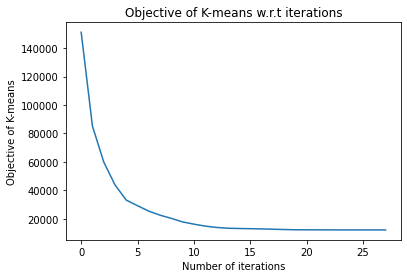

In [ ]:
plt.title("Objective of K-means w.r.t iterations")
plt.plot(result[2])
plt.xlabel("Number of iterations")
plt.ylabel("Objective of K-means")
plt.show()